# 1: Data Simulation

In [289]:
import numpy as np
import pandas as pd
import os, pdb, sys, pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# BASE DATASET
path = 'C://Users//cshul//Downloads//adult//adult.data'
df = pd.read_csv(path, header = None)
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df.columns = cols
keeps = ['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = df[keeps]
df['geq_50k'] = [1 if i == ' <=50K' else 0 for i in df['income']]
df = df.drop(['income'], axis = 1)
tr, te = train_test_split(df, test_size = 0.3, random_state = 42)
tr.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,geq_50k
19749,34,Self-emp-not-inc,9,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,2179,12,United-States,1
1216,48,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,7688,0,40,United-States,0
27962,23,State-gov,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,30,United-States,1
23077,56,Local-gov,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,1
10180,17,Private,7,Never-married,Priv-house-serv,Own-child,White,Female,0,0,9,United-States,1


In [290]:
ted = te.copy(deep = True)
ted['age'] = [1.1 * i for i in ted['age']]
ted['education-num'] = [50*i for i in ted['education-num']]
ted['capital-gain'] = [20*i for i in ted['capital-gain']]
ted['capital-loss'] = [20*i for i in ted['capital-loss']]
ted['hours-per-week'] = [20*i for i in ted['hours-per-week']]
ted.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,geq_50k
14160,29.7,Private,500,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,760,United-States,1
27048,49.5,State-gov,450,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,800,United-States,1
28868,31.9,Private,650,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,1100,United-States,0
5667,33.0,Private,650,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,800,United-States,1
7827,31.9,Self-emp-not-inc,500,Divorced,Craft-repair,Not-in-family,White,Male,44040,0,1000,United-States,1


Model Evaluation:

Evaluate the baseline model on the modified datasets.
Measure performance metrics (e.g., accuracy, precision, recall) to observe how the model's performance degrades due to the introduced drift.
Adaptation Strategies:

Implement strategies to adapt the model to the drifted data, such as retraining the model, using online learning methods, or applying domain adaptation techniques.
Compare the performance of the adapted model to the baseline model on the drifted datasets.

# Train GBC

In [291]:
from catboost import CatBoostClassifier, Pool
import pandas as pd

cat_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
model = CatBoostClassifier(iterations=200, depth=4, learning_rate=0.05, loss_function = 'Logloss')
keeps = [i for i in tr.columns if i != 'geq_50k']
model.fit(tr[keeps], tr['geq_50k'], cat_features=cat_features)
tr['pred'] = model.predict(tr[keeps])
te['pred'] = model.predict(te[keeps])
ted['pred'] = model.predict(ted[keeps])
tr.head()

0:	learn: 0.6477436	total: 46.2ms	remaining: 9.2s
1:	learn: 0.6077563	total: 92.7ms	remaining: 9.17s
2:	learn: 0.5734370	total: 133ms	remaining: 8.74s
3:	learn: 0.5420244	total: 181ms	remaining: 8.85s
4:	learn: 0.5156586	total: 230ms	remaining: 8.97s
5:	learn: 0.4941385	total: 278ms	remaining: 8.99s
6:	learn: 0.4753703	total: 320ms	remaining: 8.83s
7:	learn: 0.4590549	total: 359ms	remaining: 8.61s
8:	learn: 0.4429819	total: 400ms	remaining: 8.48s
9:	learn: 0.4314216	total: 445ms	remaining: 8.46s
10:	learn: 0.4193477	total: 486ms	remaining: 8.36s
11:	learn: 0.4125677	total: 529ms	remaining: 8.29s
12:	learn: 0.4035813	total: 574ms	remaining: 8.25s
13:	learn: 0.3951483	total: 699ms	remaining: 9.28s
14:	learn: 0.3881809	total: 752ms	remaining: 9.27s
15:	learn: 0.3825140	total: 802ms	remaining: 9.22s
16:	learn: 0.3779713	total: 833ms	remaining: 8.97s
17:	learn: 0.3734810	total: 869ms	remaining: 8.79s
18:	learn: 0.3695130	total: 912ms	remaining: 8.69s
19:	learn: 0.3651025	total: 960ms	remain

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,geq_50k,pred
19749,34,Self-emp-not-inc,9,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,2179,12,United-States,1,1
1216,48,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,7688,0,40,United-States,0,0
27962,23,State-gov,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,30,United-States,1,1
23077,56,Local-gov,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,1,1
10180,17,Private,7,Never-married,Priv-house-serv,Own-child,White,Female,0,0,9,United-States,1,1


In [292]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
vals = ['train', 'test', 'te-drift']
vals = vals[::-1]
for f in [tr, te, ted]: 
    y, yp = f['geq_50k'], f['pred']
    print(vals[-1])
    vals.pop()
    print('accuracy: ' + str(accuracy_score(y,yp)))
    print('precision: ' + str(precision_score(y,yp)))
    print('recall: ' + str(recall_score(y,yp)))
    print('f1: ' + str(f1_score(y,yp)))
    print(confusion_matrix(y,yp))
    print('-------------------------------')

train
accuracy: 0.8699543699543699
precision: 0.8899918189255522
recall: 0.9451491456704315
f1: 0.916741573033708
[[ 3510  2017]
 [  947 16318]]
-------------------------------
test
accuracy: 0.8695874705701709
precision: 0.8920461753139668
recall: 0.9432595573440644
f1: 0.9169383231190508
[[1463  851]
 [ 423 7032]]
-------------------------------
te-drift
accuracy: 0.6924966731497595
precision: 0.9668554646528215
recall: 0.618242790073776
f1: 0.7542137129765996
[[2156  158]
 [2846 4609]]
-------------------------------


# Compute PE

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gudhi import RipsComplex, SimplexTree

# Combine df and df_drifted
df_combined = pd.concat([tr, ted]).reset_index(drop=True)

# Generate a time index
df_combined['time'] = np.arange(len(df_combined))

# Create a function to compute persistence diagrams
def compute_persistence_diagrams(data):
    rips_complex = RipsComplex(points=data)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    simplex_tree.persistence()
    persistence_intervals = simplex_tree.persistence_intervals_in_dimension(1)
    return persistence_intervals

# Create a function to compute persistence entropy
def compute_persistence_entropy(diagrams):
    entropies = []
    for diagram in diagrams:
        lifetimes = diagram[:, 1] - diagram[:, 0]
        lifetimes = lifetimes[lifetimes > 0]
        if len(lifetimes) > 0:
            p = lifetimes / lifetimes.sum()
            entropy = -np.sum(p * np.log(p))
        else:
            entropy = 0
        entropies.append(entropy)
    return entropies

# Compute persistence entropy over time
window_size = 30
entropy_values = []

for start in range(len(df_combined) - window_size + 1):
    window_data = df_combined[['age', 'education-num', 'capital-gain', 'capital-loss']].iloc[start:start + window_size].values
    persistence_diagrams = [compute_persistence_diagrams(window_data)]
    entropy_value = compute_persistence_entropy(persistence_diagrams)[0]
    entropy_values.append(entropy_value)
df_combined['pe'] = [0]*29 + entropy_values
dfc = df_combined.copy(deep = True)
dfc.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,geq_50k,pred,time,pe
0,34.0,Self-emp-not-inc,9,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,2179,12,United-States,1,1,0,0.0
1,48.0,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,7688,0,40,United-States,0,0,1,0.0
2,23.0,State-gov,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,30,United-States,1,1,2,0.0
3,56.0,Local-gov,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,1,1,3,0.0
4,17.0,Private,7,Never-married,Priv-house-serv,Own-child,White,Female,0,0,9,United-States,1,1,4,0.0


In [294]:
avgs = [] 
idx = [] 
start, stop = 0, 100
while stop < len(dfc): 
    vals = list(dfc['pe'])[start:stop]
    avgs.append(np.mean(vals))
    idx.append(':' + str(stop))
    start = stop
    stop += 100
print(idx)

[':100', ':200', ':300', ':400', ':500', ':600', ':700', ':800', ':900', ':1000', ':1100', ':1200', ':1300', ':1400', ':1500', ':1600', ':1700', ':1800', ':1900', ':2000', ':2100', ':2200', ':2300', ':2400', ':2500', ':2600', ':2700', ':2800', ':2900', ':3000', ':3100', ':3200', ':3300', ':3400', ':3500', ':3600', ':3700', ':3800', ':3900', ':4000', ':4100', ':4200', ':4300', ':4400', ':4500', ':4600', ':4700', ':4800', ':4900', ':5000', ':5100', ':5200', ':5300', ':5400', ':5500', ':5600', ':5700', ':5800', ':5900', ':6000', ':6100', ':6200', ':6300', ':6400', ':6500', ':6600', ':6700', ':6800', ':6900', ':7000', ':7100', ':7200', ':7300', ':7400', ':7500', ':7600', ':7700', ':7800', ':7900', ':8000', ':8100', ':8200', ':8300', ':8400', ':8500', ':8600', ':8700', ':8800', ':8900', ':9000', ':9100', ':9200', ':9300', ':9400', ':9500', ':9600', ':9700', ':9800', ':9900', ':10000', ':10100', ':10200', ':10300', ':10400', ':10500', ':10600', ':10700', ':10800', ':10900', ':11000', ':11100

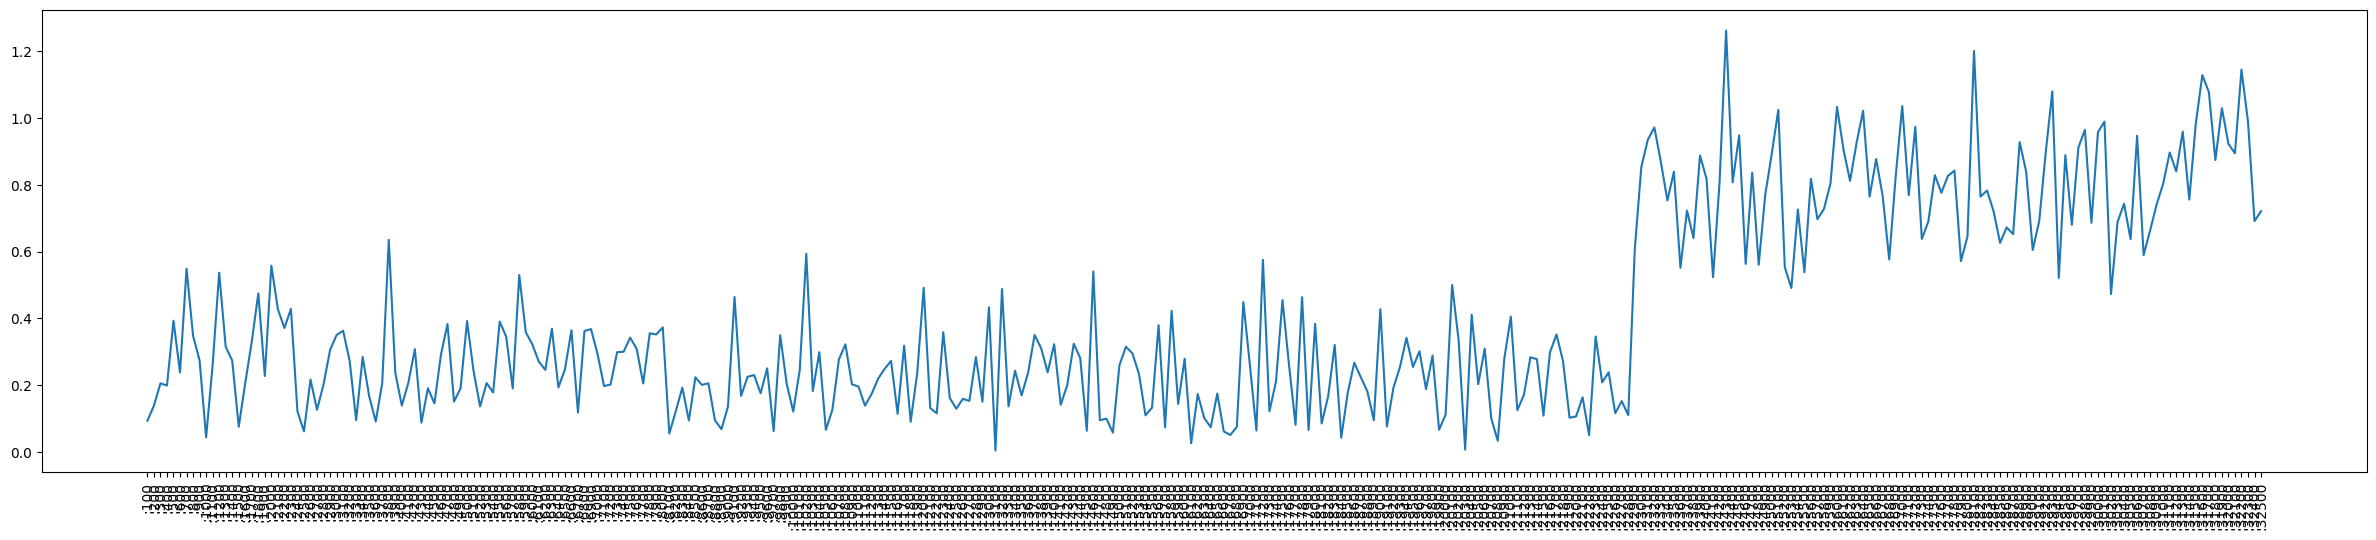

In [295]:
plt.figure(figsize=(30,6))
plt.plot(range(len(avgs)), avgs, label = 'average_pe')
plt.xticks(range(len(avgs)), idx, rotation = 90)
plt.show()

In [296]:
# Next: add psi calculation. redo simulation multiple times, showing that the change in pe scales with the amount of drift introduced. It goes up if we increase the size of the change. 
# It goes down if we decrease the size of the change. Also consider checking for the stationarity of the PE series. If it's stationary, no drift. If not, drift. 